In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv("/home/user/Pulpit/pani_ela_data_science/temat2/kc_house_data/kc_house_data.csv")
plt.rcParams["figure.figsize"] = (15,5)

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression(n_jobs=1) 

#Your code:

model.fit(X,y)
#Hint: .fit()
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

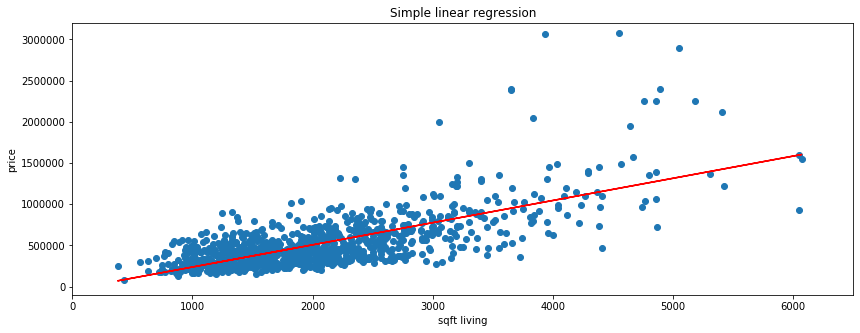

Mean squared error equals: 57947526161.288376
Model score: 0.496708801663114


In [4]:
#b) b) Evaluate(mean square error) and visualise created model.
#Your code:
plt.figure(figsize=(14, 5))
X = house_df[["sqft_living"]][:1000].values
y = house_df[["price"]][:1000].values

y_pred = model.predict(X)

plt.scatter(X,y)
plt.plot(X, y_pred, color='red') #tylko to się zmienia
plt.xlabel("sqft living")
plt.ylabel("price")
plt.ylim((-100000,3200000))
plt.xlim((0,6500))
plt.title("Simple linear regression")
plt.show()
# Hint: model.predict(), model.intercept_,  model.coef_, model.score()

print("Mean squared error equals: {}".format(mean_squared_error(y,y_pred)))
print("Model score: {}".format(model.score(X,y)))

<Figure size 1008x360 with 0 Axes>

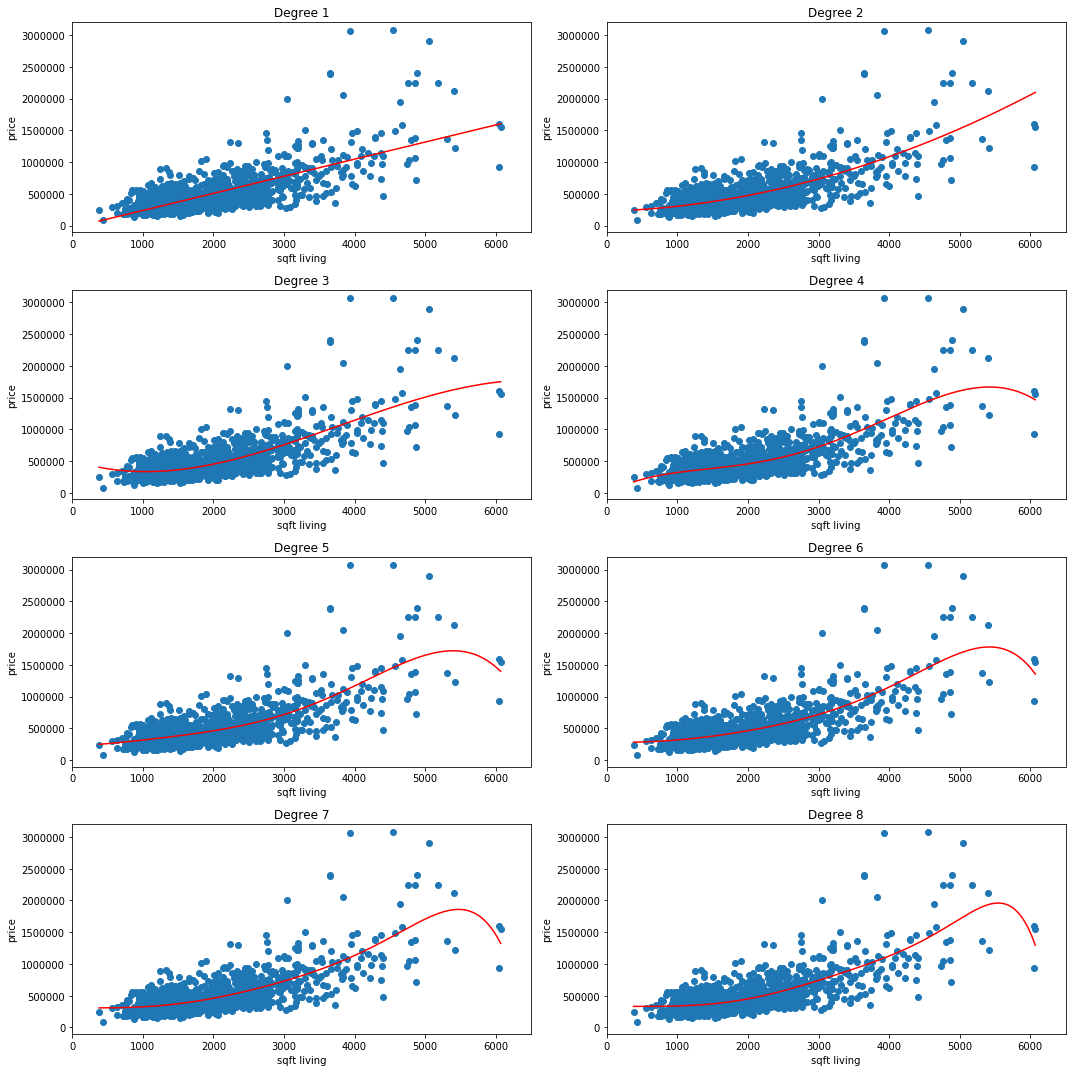

In [43]:
# c)
from sklearn.preprocessing import PolynomialFeatures

house_df1 = house_df[0:1000].sort_values(by='sqft_living') # czemu to odrzuca część danych

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

errors = []
# Aha pewnie tnie bo odcinamy dopiero po posortowaniu
# ustawiam rzeczy związane z wykresami
plt.figure(figsize=(14, 5))
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
for order in range(1,9):

    # Comment below
    poly_reg = PolynomialFeatures(order, include_bias = False)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly,y)
    # then we make a plot withs curve done using this transformed data
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    X_grid = np.arange(min(X),max(X),0.1) # in order to have a smooth
                    # bo nie włożyłaś X_grid jeszcze
    X_grid = X_grid.reshape((len(X_grid),1))
    
    errors.append(mean_squared_error(y, lin_reg_2.predict(poly_reg.fit_transform(X))) )
    
    # than using fitted polynomial of a given degree we visualise it
    ax = plt.subplot(4,2,order) # this is only setting an enpty figure for plot
    # now we can fill the figure with a plot
    plt.scatter(X,y)
    #plt.plot([1,2,order*10000],[1,2,order*10000], color = 'orange') - printuje poledynczą linie ok
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'red')
    plt.ylim((-100000,3200000))
    plt.xlim((0,6500))
    plt.xlabel('sqft living')
    plt.ylabel('price')
    plt.title("Degree {}".format(order))
    
plt.tight_layout()
plt.show()

Comment: In order to perform polynomial regression, first we transform our set of variables (X) so that it include powers of variables, using fit_transform() method. And then fit a LinearRegression model to these transformed data.

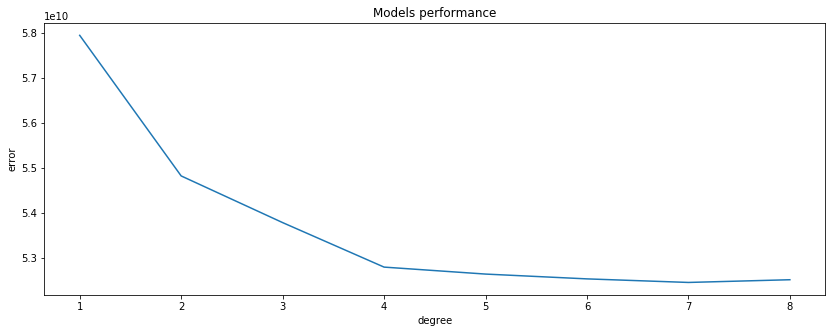

In [44]:
#Your code: # Splotować wykres błądu w zależności od stopnia wielomianu
plt.figure(figsize=(14, 5))

plt.plot([1,2,3,4,5,6,7,8],errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

In [58]:
#a) ------------------------------------------------- to ozn.
from sklearn.preprocessing import PolynomialFeatures

#house_df1 = house_df.sort_values(by='sqft_living') # czemu to odrzuca część danych

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

errors_train = []
errors_test = []
for order in range(1,9):
                                                        # X_order - chyba chodzi o zwykłe X
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

    poly_reg = PolynomialFeatures(order, include_bias = False)
    poly_reg_test = PolynomialFeatures(order, include_bias = False)
    X_poly = poly_reg.fit_transform(X_train) 
    X_poly_test = poly_reg.fit_transform(X_test)
    
    poly_reg.fit(X_poly,y_train)
    # then we make a plot withs curve done using this transformed data
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)
    
    # Possible source of error: (its ok that you train a model only
    # on the test data) but observe that you use fit_transform both on test_data and train_data, when you 
    # append to errors - to jest prawdopodobnie przyczyna błędu.
    # Tylko zauważ, że wytrenowałaś owszem na training set, ale to nie zmienia faktu, że muisz dapasować do 
    # rozszerzonego zbioru danych, co oznacza, że też musisz rozszerzyć test set przy użyciu Polynomial Features
    # Już to zrobiłam i jest tak samo.To już nie wiem. 
    # Już wiem and everything is muy bien!

    # train error
    errors_train.append(mean_squared_error(y_train, lin_reg_2.predict(X_poly)))
    # test error
    # Sprawdzam jak model wytremowany na danych traningowych wypada na danych testowych:
    errors_test.append(mean_squared_error(y_test, lin_reg_2.predict(X_poly_test)))

# To samo tylko wg polecenia powtórzone dla zbioru train. Dla test pokazywanie dopasowaniej funkcji-nie, 
# bo przecież nie o to chodzi żeby tranować na danych testowych, a jedynie sprawdzić jak
# sprawdza się na nich model wytrenowany na danych traningowych

<Figure size 1008x360 with 0 Axes>

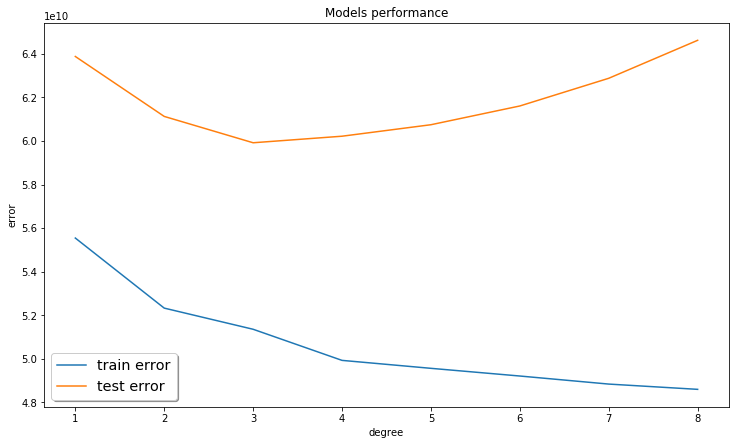

In [66]:
plt.figure(figsize=(14, 5))
fig, ax = plt.subplots()
plt.plot([1,2,3,4,5,6,7,8],errors_train, label="train error")
plt.plot([1,2,3,4,5,6,7,8],errors_test, label='test error')
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')
fig.tight_layout()
fig.set_size_inches(w=11,h=7)
plt.show()

# WAŻNY KOMENTARZ
# co do kształtu, są one sensowne, co train error spada, a test error raz spada raz rośnie-maleje a potem 
# bo dla za wysokich wielomianów model jest przetrenowany. Spodziewalibyśmy się, że train error powinien być 
# mniejszy niż test error - nie wiem co jest? nie tak?

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

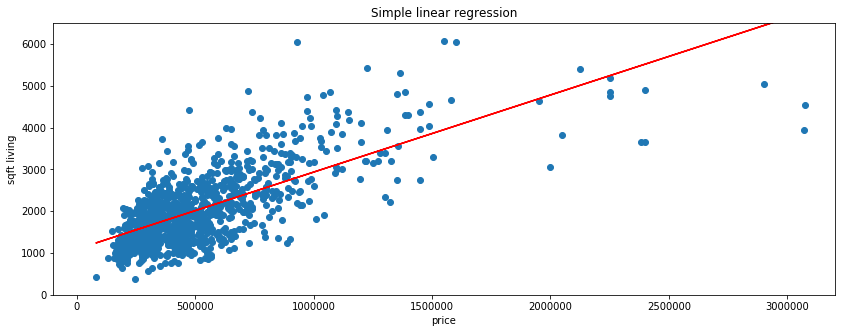

Mean squared error equals: 396407.1889615157


In [9]:
#a)

#Your code:
plt.figure(figsize=(14, 5))
X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression(n_jobs=1) 
model.fit(X,y)

y_pred = model.predict(X)

plt.scatter(X,y)
plt.plot(X, y_pred, color='red') 
plt.ylabel("sqft living")
plt.xlabel("price")
plt.xlim((-100000,3200000))
plt.ylim((0,6500))
plt.title("Simple linear regression")
plt.show()
print("Mean squared error equals: {}".format(mean_squared_error(y,y_pred)))

In [10]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions
# up to third degree
#Apply more features and propose better model for predicting house prices. Try to beat proposed one.

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 48749248247.98077


In [11]:
from sklearn.preprocessing import FunctionTransformer

##########################################################
# JUST EXAMPLE 
def add_ten(x):
    return x + 10

ten_transformer = FunctionTransformer(add_ten) # instancjacja

x1 = ten_transformer.transform(X[:,1].reshape(-1,1))

X + x1
##########################################################

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[ 6840., 11310.,  5667., ...,  5660.,  5660.,  5660.],
       [ 9822., 14494.,  7259., ...,  7252.,  7252.,  7252.],
       [10780., 20010., 10016., ..., 10010., 10010., 10010.],
       ...,
       [ 2380.,  2710.,  1367., ...,  1360.,  1360.,  1360.],
       [ 3998.,  4786.,  2406., ...,  2398.,  2398.,  2398.],
       [ 2106.,  2162.,  1093., ...,  1086.,  1086.,  1086.]])

In [12]:
######################################################################
# JUST ANOTHER EXAMPLE
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

poly = PolynomialFeatures(3, include_bias = False)
features = poly.fit_transform(features)
features # x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x3*2
######################################################################

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [13]:
# Okej, to po prostu muszę się zastanoić jakie człony chce
# z explaoratory analysis z poprzedniego notebooka można zauważyć, że cena rośnie wraz ze stopniem jak exp

In [14]:
# W przykładzie był podany model z 4 cechami, ale ja mogę zastosować inny, ale muszę użyć więcej miż jednej cechy

# pierwsza propozycja
X = house_df[['sqft_living', 'grade']].values.reshape(-1,2)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 56454260011.25768


In [15]:
# druga propozycja

# z exploratory analysis: price rośnie exponencjalnie z grade i liniowo z sqft_living
X = house_df[['sqft_living', 'grade']].values.reshape(-1,2)
y = house_df.price.values.reshape(-1)

#X
#array([[1180,    7],
#       [2570,    7],
#       [ 770,    6],

def exp(x):
    return np.exp(x/2)

ten_transformer = FunctionTransformer(np.exp) # instancjacja

x3 = ten_transformer.transform(X[:,1].reshape(-1,1))

X = np.concatenate([X,x3], axis = 1)

#X
#array([[1180.        ,    7.        , 1096.63315843],
#       [2570.        ,    7.        , 1096.63315843],
#       [ 770.        ,    6.        ,  403.42879349],

poly = PolynomialFeatures(3,  interaction_only=False, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 57735982961.97844


/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


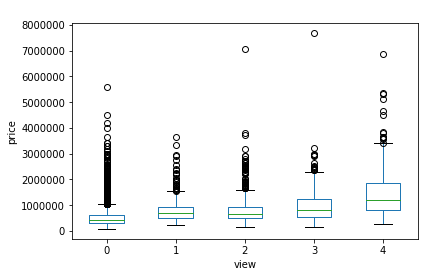

In [16]:
house_df.boxplot(by="view", column="price", grid=False)
plt.ylabel("price")
title_boxplot = ' '
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

In [17]:
# Z powyższych wekresów widzę, że view nie jest jest informacyjny

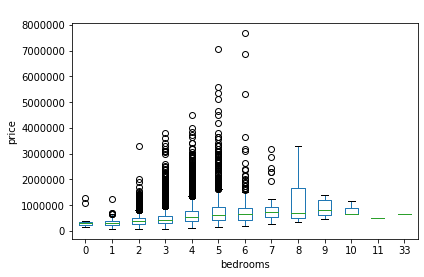

In [18]:
house_df.boxplot(by="bedrooms", column="price", grid=False)
plt.ylabel("price")
title_boxplot = ' '
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

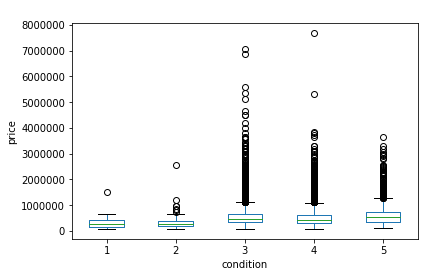

In [19]:
house_df.boxplot(by="condition", column="price", grid=False)
plt.ylabel("price")
title_boxplot = ' '
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

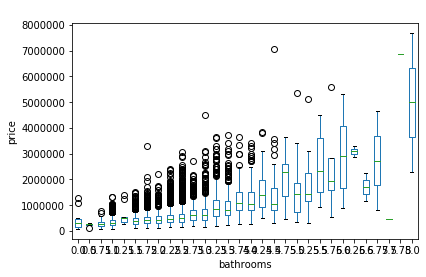

In [20]:
house_df.boxplot(by="bathrooms", column="price", grid=False)
plt.ylabel("price")
title_boxplot = ' '
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

In [21]:
# trzecia propozycja
X = house_df[['sqft_living', 'bedrooms', 'grade']].values.reshape(-1,3)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, interaction_only = True, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 56567505593.88571


In [22]:
# druga propozycja
house_df["ratio"] = house_df['bedrooms']/house_df['condition']

# z exploratory analysis: price rośnie exponencjalnie z grade i liniowo z sqft_living
X = house_df[['sqft_living', 'ratio']].values.reshape(-1,2)
y = house_df.price.values.reshape(-1)

def exp(x):
    return np.exp(x/2)

#ten_transformer = FunctionTransformer(np.exp) # instancjacja
#x3 = ten_transformer.transform(X[:,1].reshape(-1,1))
#X = np.concatenate([X,x3], axis = 1)
poly = PolynomialFeatures(3,  interaction_only=False, include_bias = False)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 61535939826.86146
